Установка библиотек

In [ ]:
!pip install matplotlib
!pip install nltk

Подключение библиотек

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Установка словаря

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/grayrest/nltk_data...


True

In [27]:
def sentiment_scores(sentence):
    # Создаем анализатор
    sid_obj = SentimentIntensityAnalyzer()
    
    # Получаем оценки тональности
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    # Вывод результатов
    print(f"\nАнализ предложения: '{sentence}'\n")
    print(f"Негативность: {sentiment_dict['neg']*100:.1f}%")
    print(f"Нейтральность: {sentiment_dict['neu']*100:.1f}%")
    print(f"Позитивность: {sentiment_dict['pos']*100:.1f}%")
    print(f"Compound score: {sentiment_dict['compound']:.3f}")
    
    # Определение общей тональности
    if sentiment_dict['compound'] >= 0.05:
        overall = "Позитивная"
    elif sentiment_dict['compound'] <= -0.05:
        overall = "Негативная"
    else:
        overall = "Нейтральная"
    print(f"\nОбщая оценка: {overall}")
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    
    # 1. Горизонтальные столбцы для компонентов
    plt.subplot(2, 1, 1)
    components = ['Негативность', 'Нейтральность', 'Позитивность']
    values = [sentiment_dict['neg'], sentiment_dict['neu'], sentiment_dict['pos']]
    colors = ['red', 'gray', 'green']
    
    bars = plt.barh(components, values, color=colors)
    plt.title('Компоненты тональности')
    plt.xlim(0, 1)
    
    # Добавляем значения на столбцы
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.2f}',
                 ha='left' if width > 0.05 else 'right',
                 va='center',
                 color='white' if width > 0.5 else 'black')
    
    # 2. Индикатор compound score (горизонтальный)
    plt.subplot(2, 1, 2)
    compound = sentiment_dict['compound']
    color = 'red' if compound < 0 else 'green'
    
    plt.barh(['Compound Score'], [compound], color=color)
    plt.xlim(-1, 1)
    plt.title('Общая оценка (-1 до +1)')
    plt.axvline(x=0, color='black', linestyle='--')
    
    plt.tight_layout()
    plt.show()


Анализ предложения: ' LOL, this movie was so bad it made me question human evolution. 0/10, would rather watch paint dry!'

Негативность: 19.7%
Нейтральность: 65.8%
Позитивность: 14.5%
Compound score: -0.307

Общая оценка: Негативная


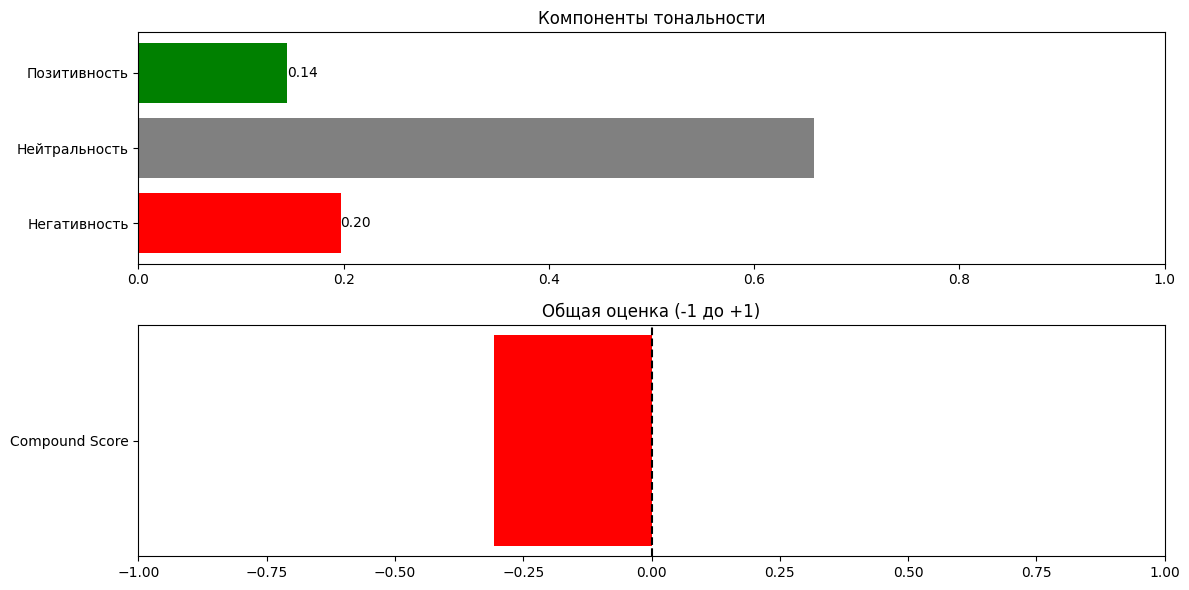

In [28]:
sentence = """ LOL, this movie was so bad it made me question human evolution. 0/10, would rather watch paint dry!"""
sentiment_scores(sentence)


Анализ предложения: 'This coffee is liquid happiness! If joy had a flavor, it would be THIS. 100/10!!! 😍'

Негативность: 0.0%
Нейтральность: 58.3%
Позитивность: 41.7%
Compound score: 0.861

Общая оценка: Позитивная


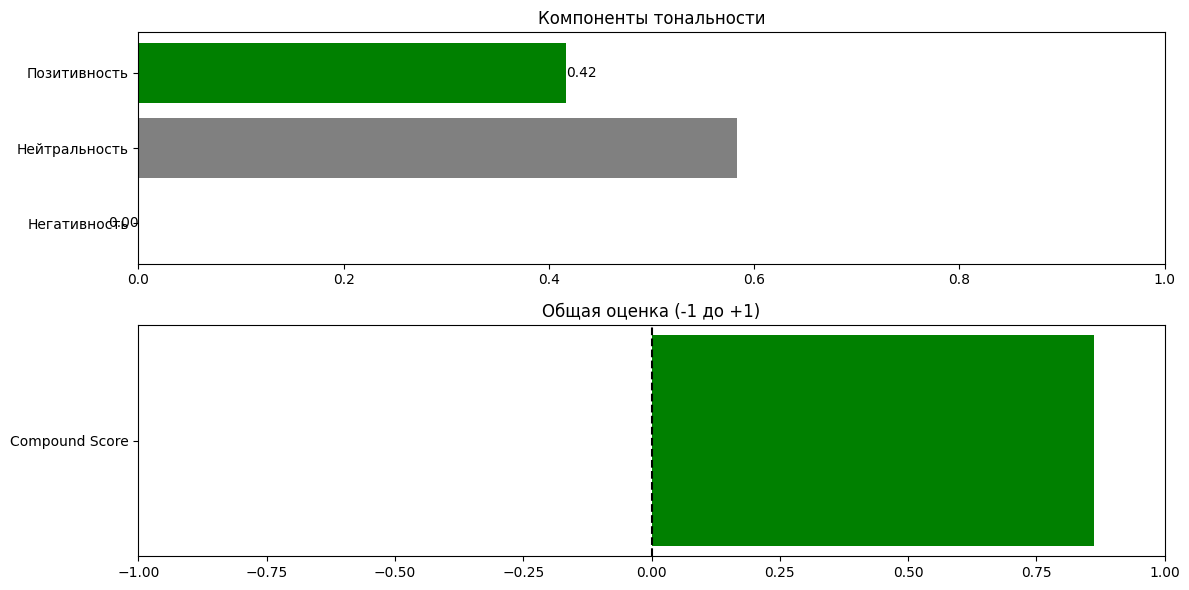

In [29]:
sentence = """This coffee is liquid happiness! If joy had a flavor, it would be THIS. 100/10!!! 😍"""
sentiment_scores(sentence)


Анализ предложения: 'Oh GREAT, another 'brilliant' idea from the genius who brought us the printer that jams every Tuesday!'

Негативность: 0.0%
Нейтральность: 75.7%
Позитивность: 24.3%
Compound score: 0.729

Общая оценка: Позитивная


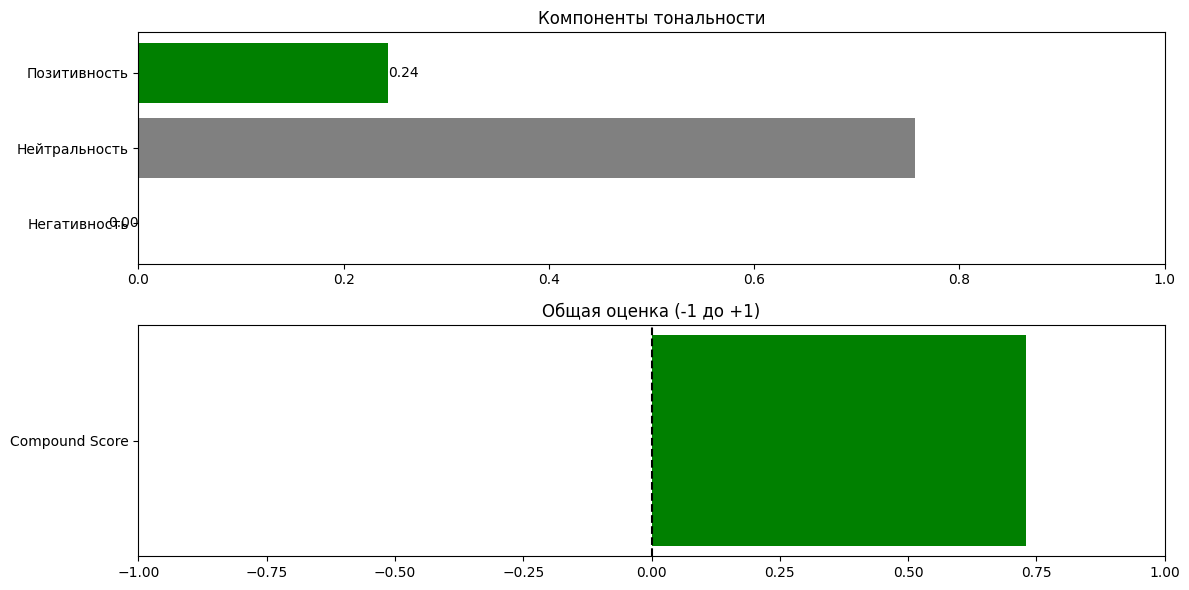

In [30]:
sentence = """Oh GREAT, another 'brilliant' idea from the genius who brought us the printer that jams every Tuesday!"""
sentiment_scores(sentence)